# CP 3 Aprendizaje de Máquinas
---
## Árboles de Decisión y Random Forest

### Ejercicio 1: Análisis de dataset Iris

Para demostrar el uso de árboles de decisión y random forest vamos a usar el dataset Iris. 

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

El dataset Iris tiene cuatro características (sepal length, sepal width, petal length, petal width) que se pueden usar para clasificar las flores de Iris en tres especies indicadas como "0", "1", "2" (setosa, versicolor, virginica )

In [4]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_names'] = df.species
# df.replace({'species_names':{
#             0:iris['target_names'][0],
#             1:iris['target_names'][1],
#             2:iris['target_names'][2]            
#         }}, inplace=True)
df.columns = [item.replace(' (cm)', '') for item in df.columns]
df.head()

,sepal length,sepal width,petal length,petal width,species,species_names
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


Busquemos la cantidad de elementos que pertenecen a cada una de las clases:

In [5]:
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

Procedamos a dividir el dataset en un conjunto de entrenamiento y otro de prueba. Se quiere entrenar usando el 70% del dataset

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.7)

### Ejercicio 2: Decision Tree aplicado a Iris

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion="entropy")
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test,y_test)

0.9555555555555556

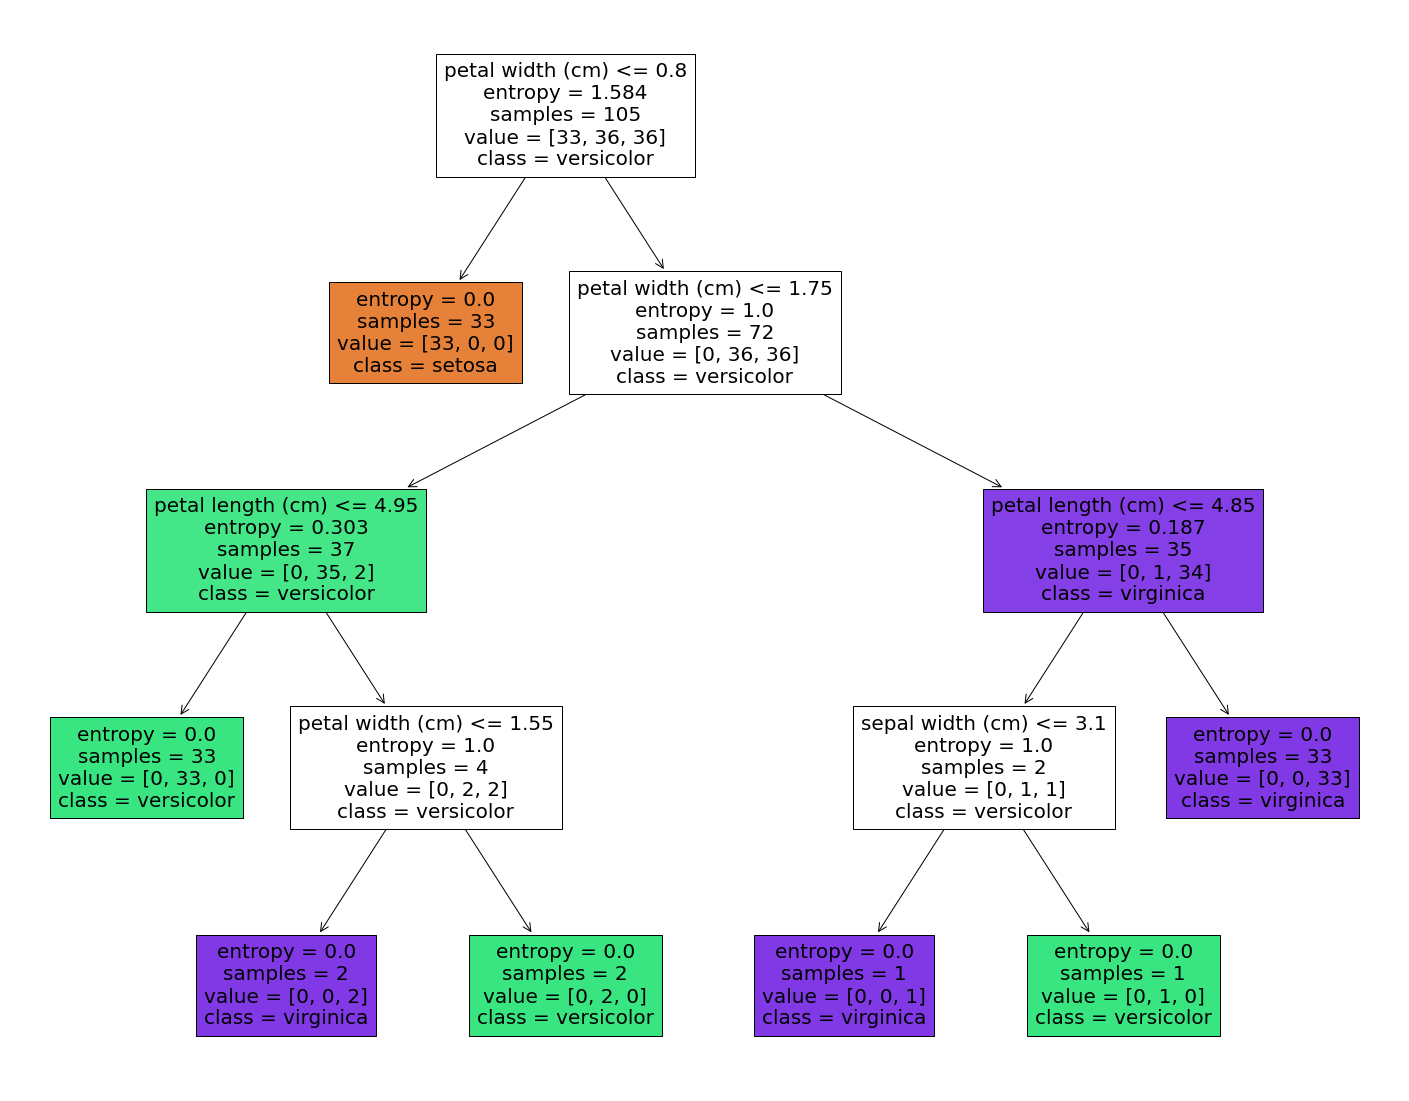

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree_clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

### Ejercicio 3: Random Forest aplicado a Iris

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
forest_clf = RandomForestClassifier(criterion="entropy")
forest_clf.fit(X_train, y_train)
forest_clf.score(X_test,y_test)

0.9555555555555556

### Ejercicio 4: Visualización de espacios de decisión

In [19]:
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

In [20]:
plt.rcParams.update({'figure.titlesize': 'large'})
step = 0.04

def mesh_plot(x, y, species, ax, clf):
    values = species.unique()
    colors = sns.color_palette()[:len(values)]
    xx, yy = np.meshgrid(
        np.arange(x.min() - 0.1, x.max() + 0.1, step),
        np.arange(y.min() - 0.1, y.max() + 0.1, step))
    mesh_predict = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    mesh_predict = mesh_predict.reshape(xx.shape)
    for i in range(len(colors)):
        ax.scatter(x[df.species == values[i]], y[df.species == values[i]], color=colors[i])
        ax.set_xlim(x.min() - 0.2, x.max() + 0.2)
        ax.set_ylim(y.min() - 0.2, y.max() + 0.2)
    ax.pcolormesh(xx, yy, mesh_predict,
        cmap=ListedColormap(sns.color_palette()[:3]), alpha=0.2, shading='auto')

In [21]:
def plot_features(df, feat1, feat2, clsf, ax):
    X = df[[feat1, feat2]]
    y = df.species
    fit_clsf = clsf(criterion="entropy").fit(X, y)
    ax.set(xlabel=feat1, ylabel=feat2)
    mesh_plot(df[feat1], df[feat2], df.species, ax, fit_clsf) 
    

/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


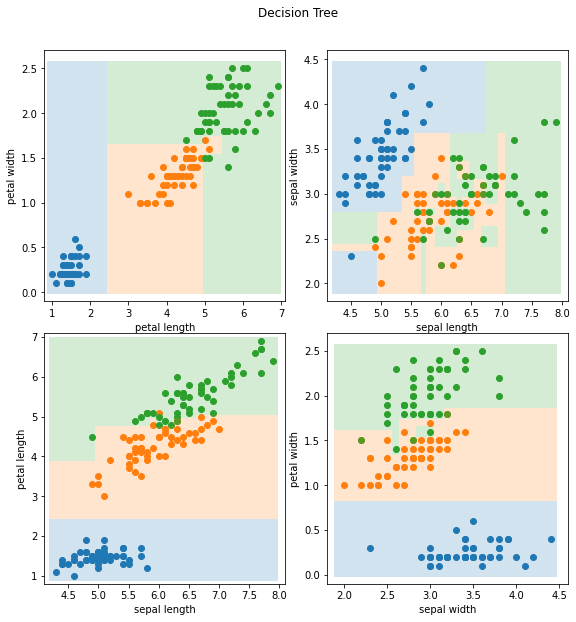

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
fig.tight_layout()
fig.suptitle('Decision Tree', y=1.05)

plot_features(df, 'petal length', 'petal width', DecisionTreeClassifier, ax1)
plot_features(df, 'sepal length', 'sepal width', DecisionTreeClassifier, ax2)
plot_features(df, 'sepal length', 'petal length', DecisionTreeClassifier, ax3)
plot_features(df, 'sepal width', 'petal width', DecisionTreeClassifier, ax4)

/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/dayany/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


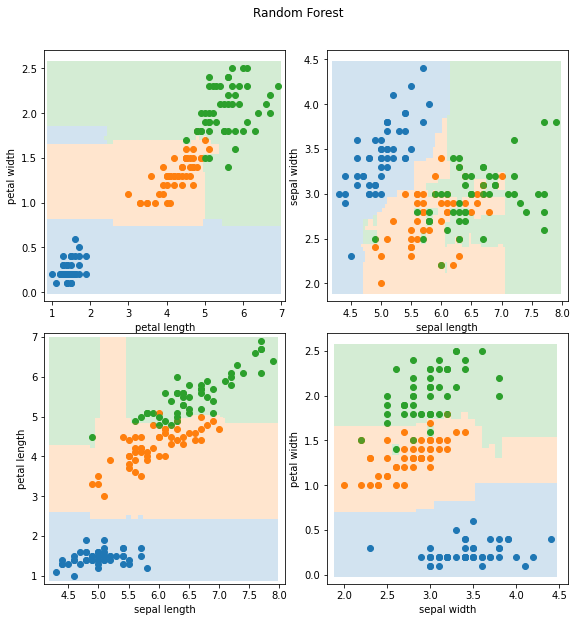

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
fig.tight_layout()
fig.suptitle('Random Forest', y=1.05)

plot_features(df, 'petal length', 'petal width', RandomForestClassifier, ax1)
plot_features(df, 'sepal length', 'sepal width', RandomForestClassifier, ax2)
plot_features(df, 'sepal length', 'petal length', RandomForestClassifier, ax3)
plot_features(df, 'sepal width', 'petal width', RandomForestClassifier, ax4)

### Ejercicio 5: Decision Tree y Random Forest aplicados al dataset de Rotten Tomatoes 

In [24]:
import os
from pathlib import Path
from typing import List
from sklearn.feature_extraction.text import CountVectorizer 

In [25]:
path_p = Path("txt_sentoken/pos")
path_n = Path("txt_sentoken/neg")

ds_p = list(path_p.iterdir())     # directorio donde están las críticas positivas
ds_n = list(path_n.iterdir())     # directorio donde están las críticas negativas

def convert_file_to_text(file_path: Path) -> str:
    text = []
    f = open(file_path)
    for line in f.readlines():
        text += line
    return ''.join(text)
    
texts_p = []    # Lista de críticas positivas
texts_n = []    # Lista de críticas negativas

for file in ds_p:
    texts_p.append(convert_file_to_text(file))
    
for file in ds_n:
    texts_n.append(convert_file_to_text(file))

In [26]:
vectorizer = CountVectorizer()
mt = vectorizer.fit_transform(texts_p + texts_n)
mta = mt.toarray()

y = [1]*1000 + [0]*1000

In [29]:
def experiments(Clsf, iterations: int) -> List[float]:
    rs = []
    # Your code here !
    for _ in range(iterations):
        X_train, X_test, y_train, y_test = train_test_split(mta, y, train_size=0.60)
        clf = Clsf(criterion="entropy")
        clf.fit(X_train, y_train)
        rs.append(clf.score(X_test, y_test))
    #
    return rs

In [30]:
results_dt = experiments(DecisionTreeClassifier,30)
np.mean(results_dt)

0.6393749999999999

In [31]:
results_rf = experiments(RandomForestClassifier,30)
np.mean(results_rf)

KeyboardInterrupt: 